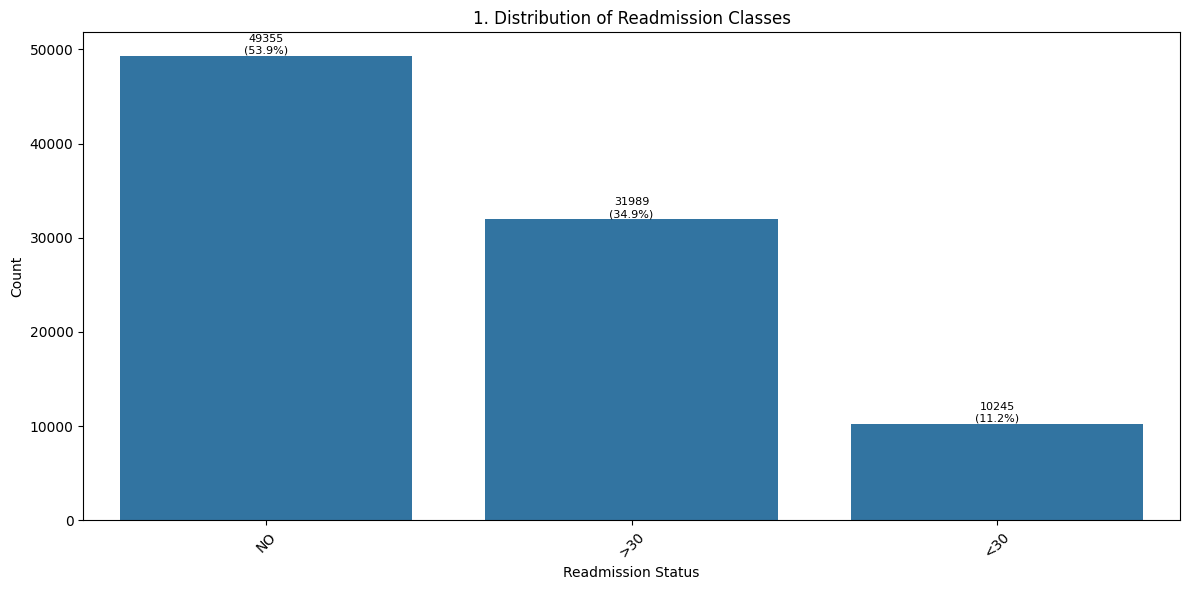

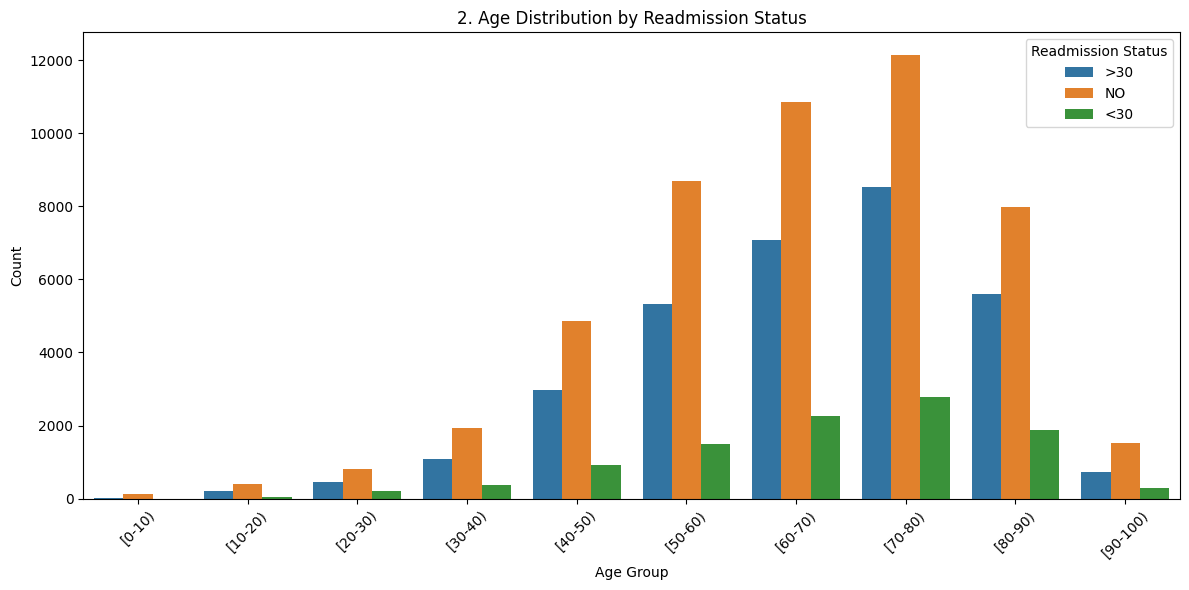

<Figure size 800x600 with 0 Axes>

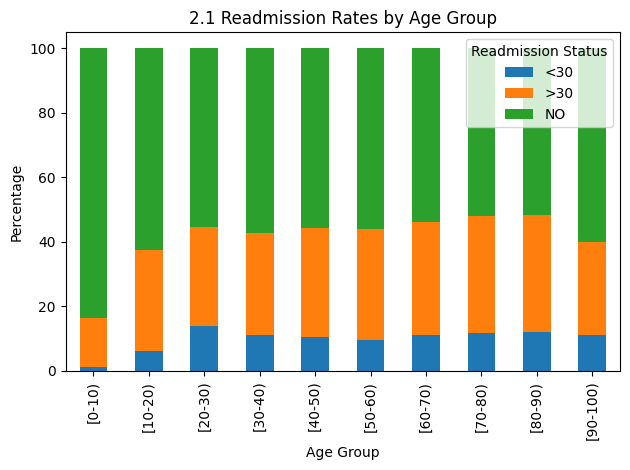

<Figure size 800x600 with 0 Axes>

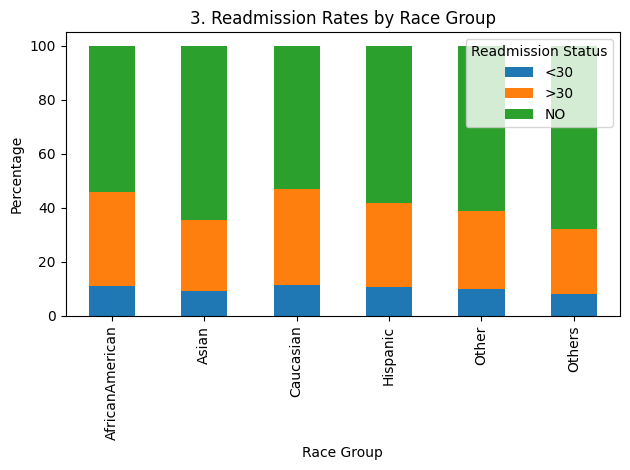

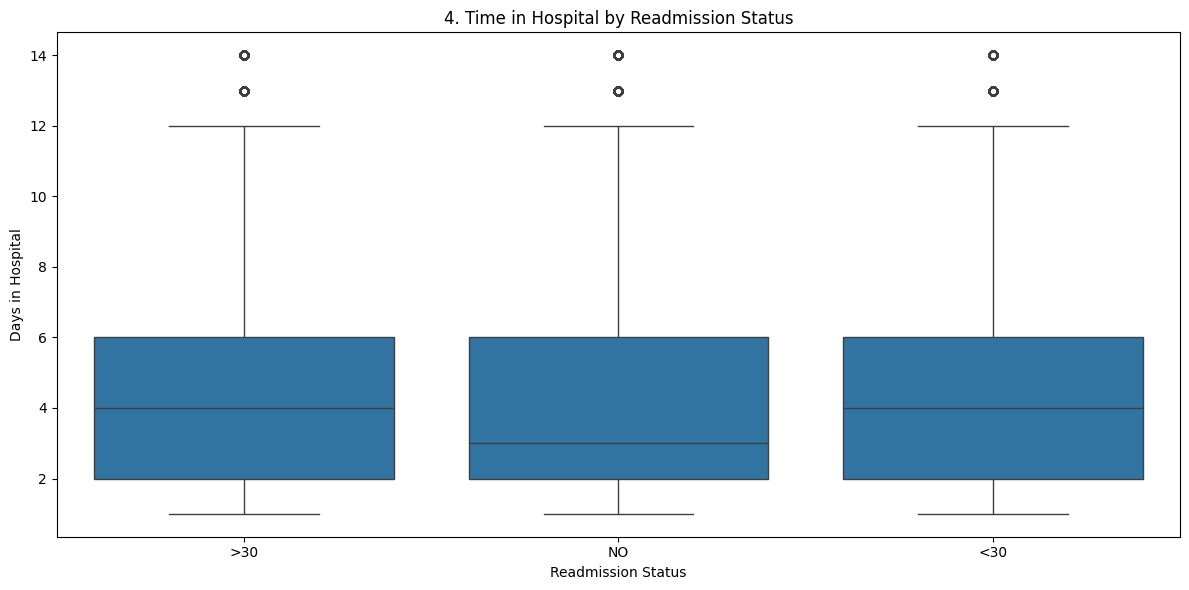

<Figure size 800x600 with 0 Axes>

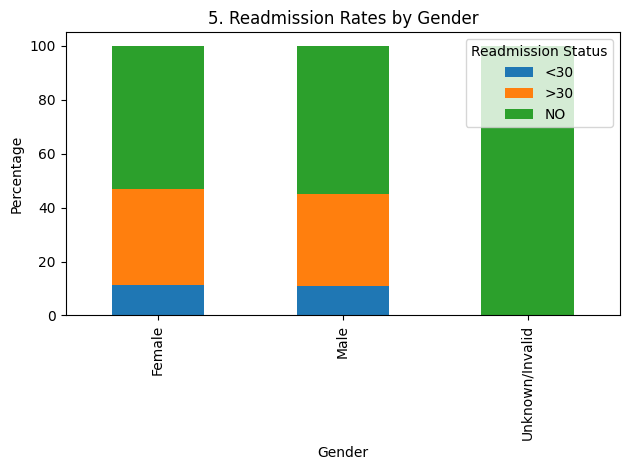

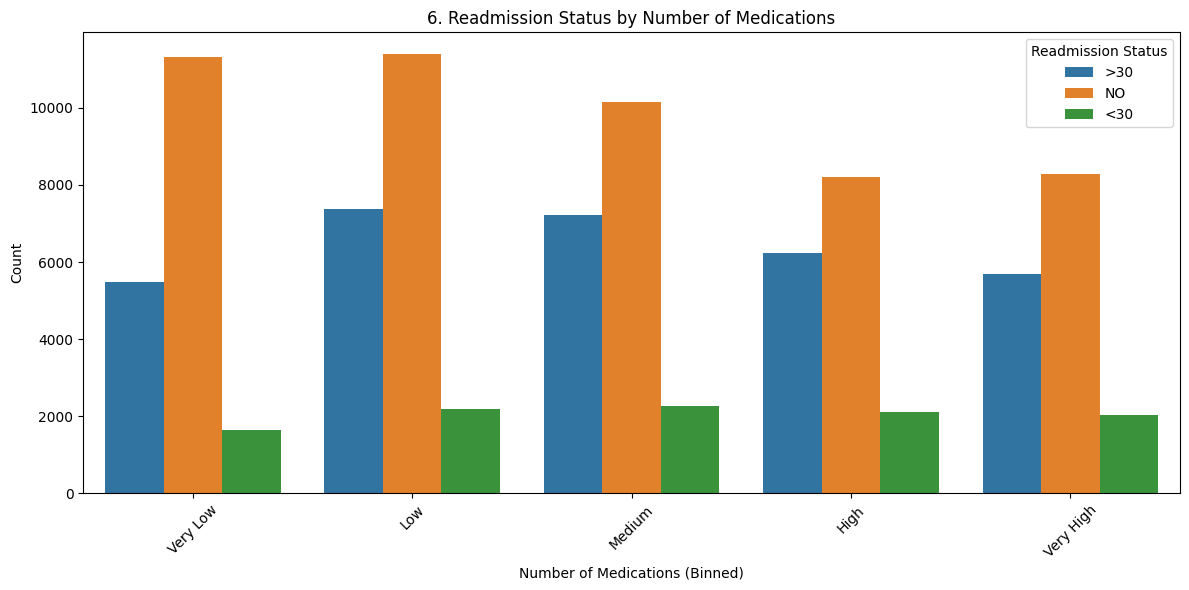

<Figure size 800x600 with 0 Axes>

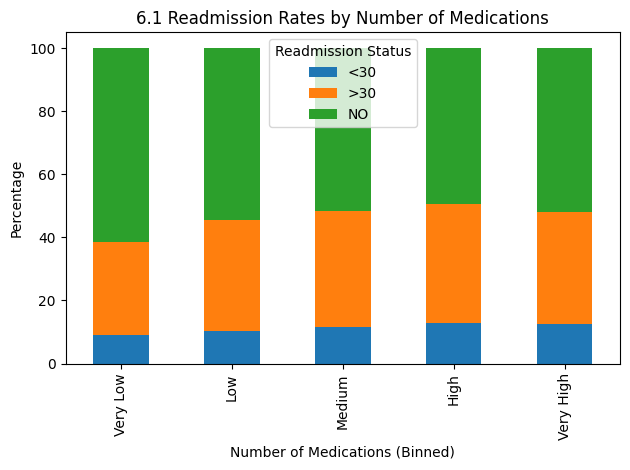

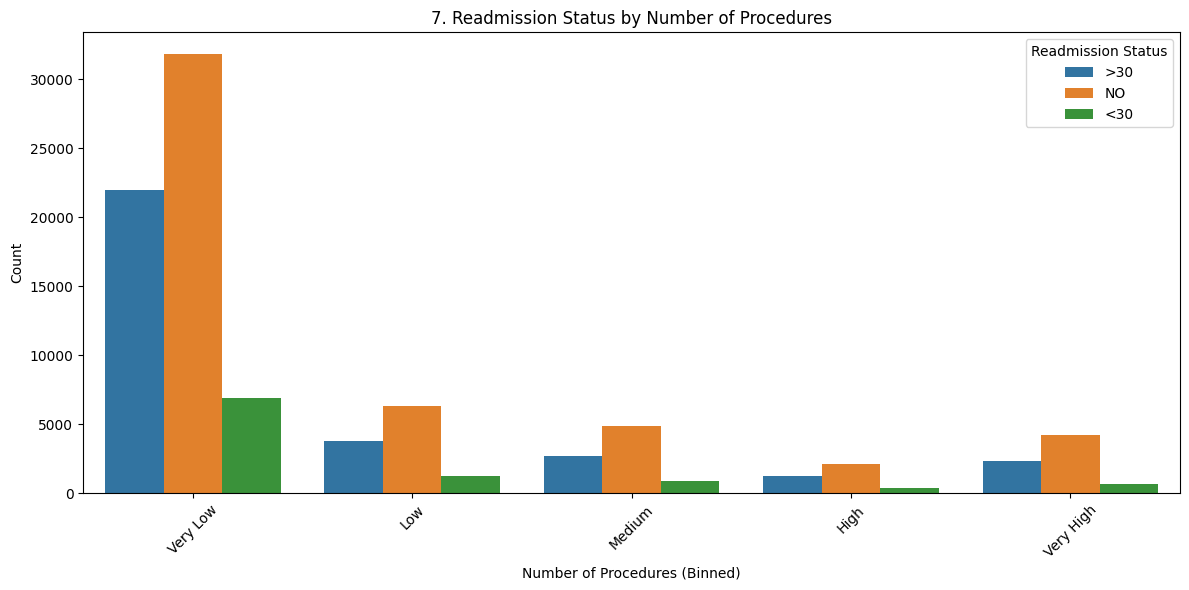

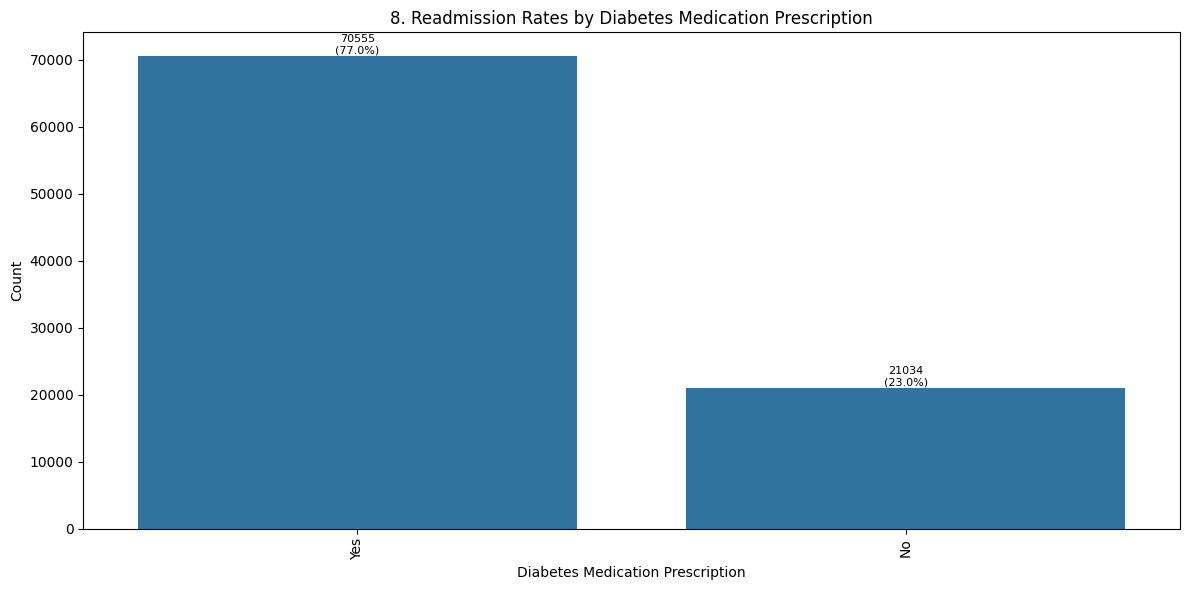

<Figure size 800x600 with 0 Axes>

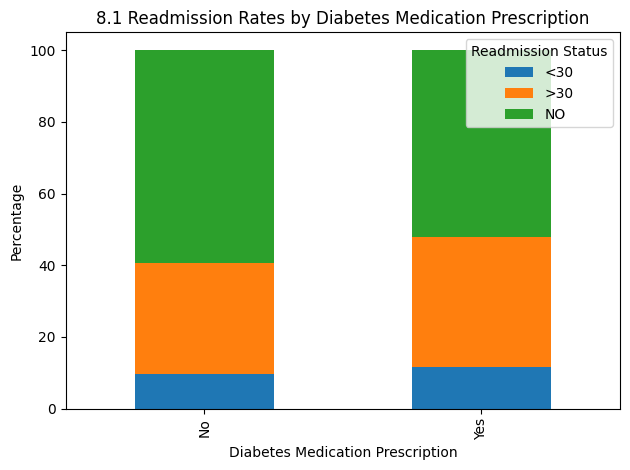

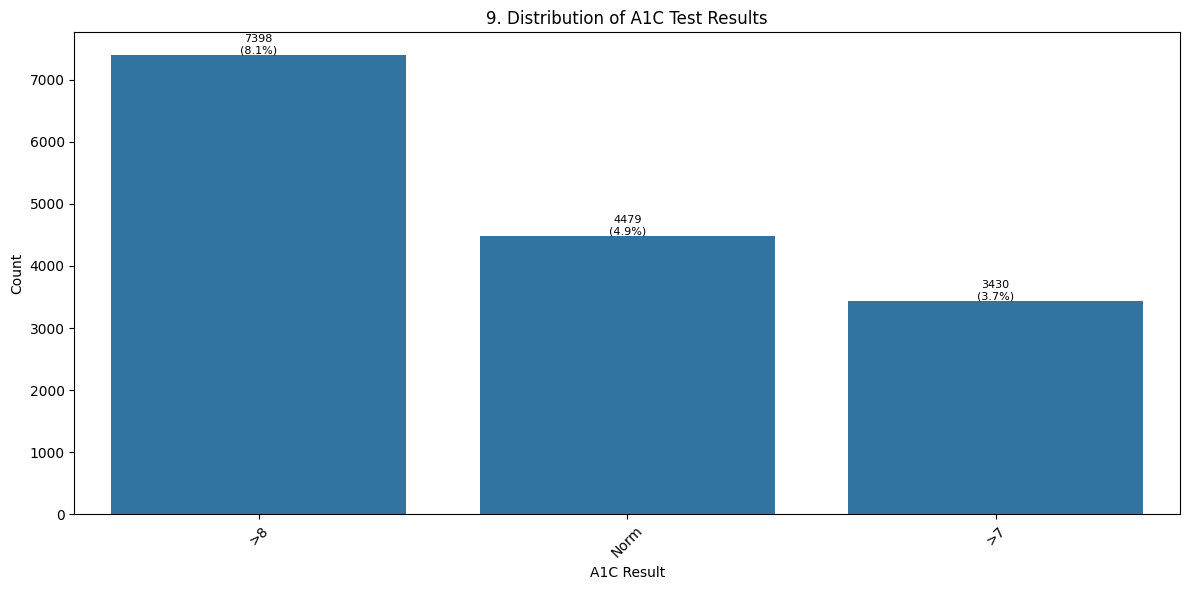

<Figure size 800x600 with 0 Axes>

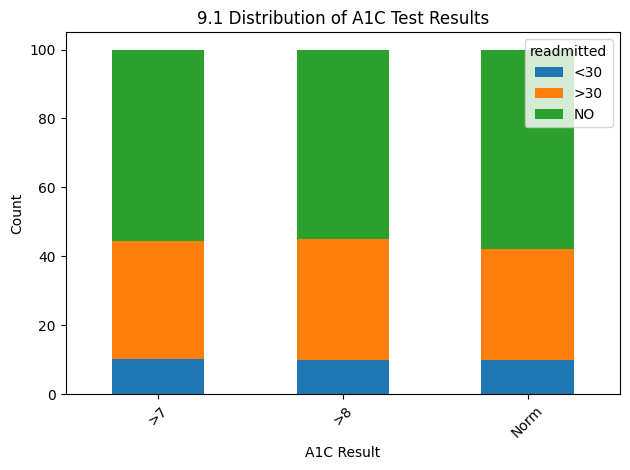

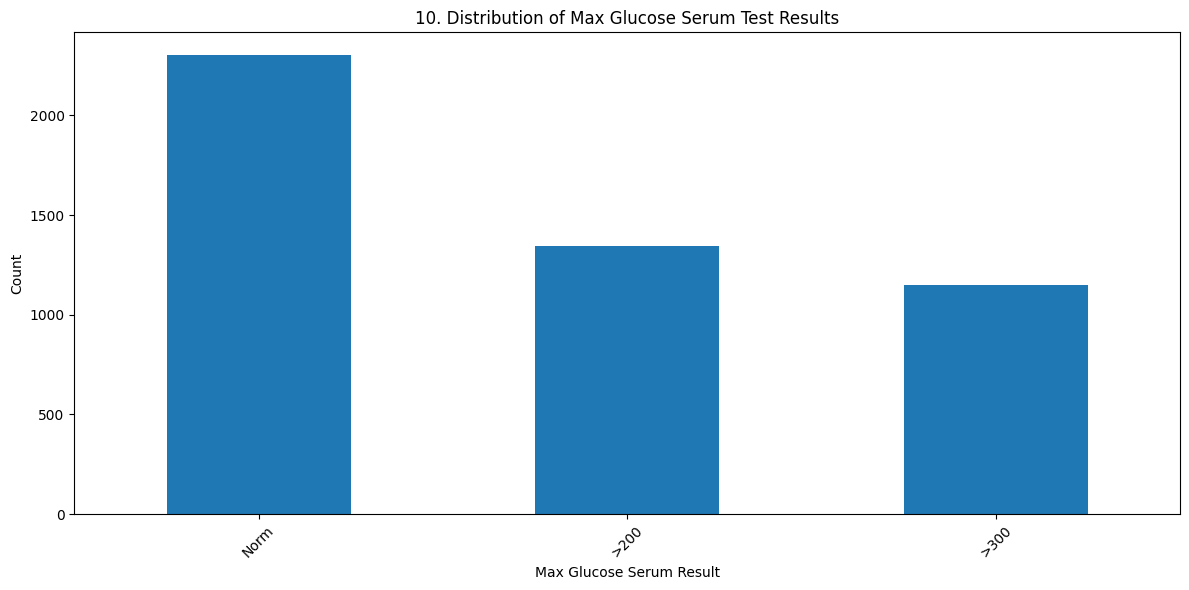

<Figure size 800x600 with 0 Axes>

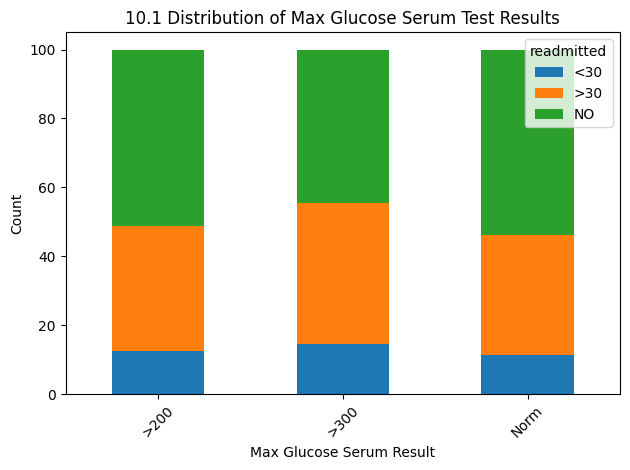

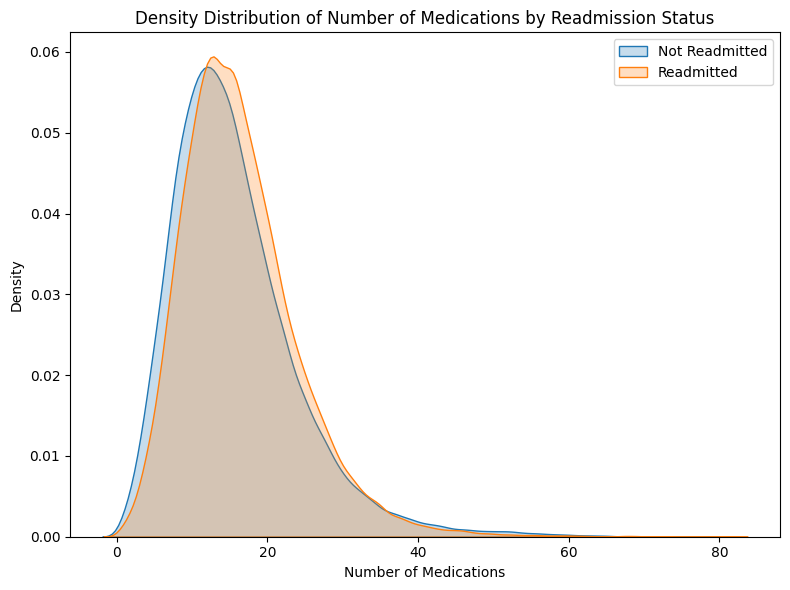

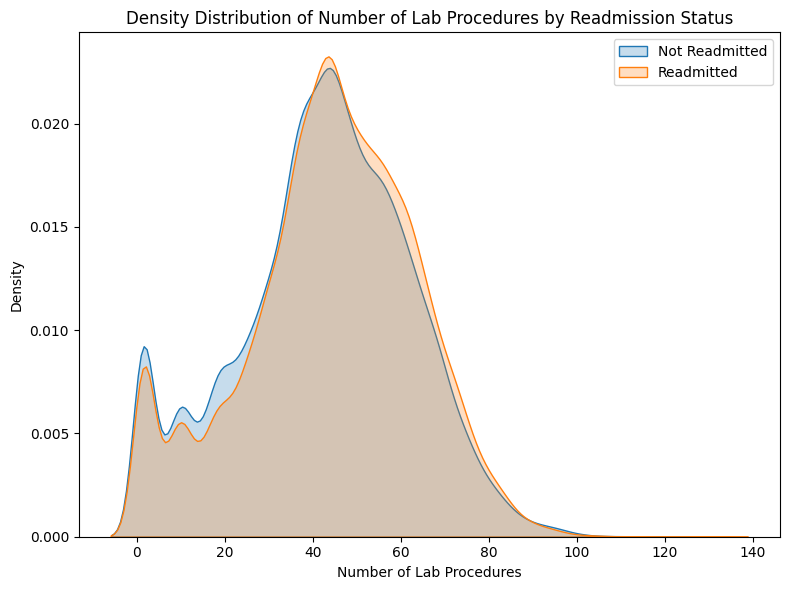

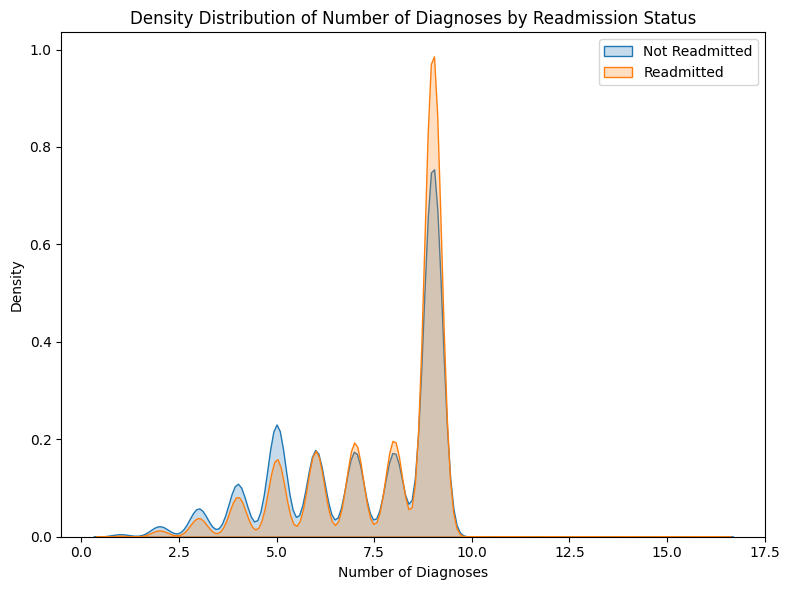

{'total_patients': 91589,
 'readmission_rates': readmitted
 NO     53.887476
 >30    34.926683
 <30    11.185841
 Name: proportion, dtype: float64,
 'avg_time_in_hospital': 4.395549683914007,
 'avg_num_medications': 16.018135365600674,
 'avg_num_procedures': 1.3378462479118671,
 'avg_num_diagnoses': 7.422365131183875}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv("Dataset/diabetic_data_training.csv")

def perform_eda():
    # Set styling for better visualizations
    #plt.style.use('seaborn-dark')

    # 1. Distribution of Readmission Classes
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=df, x='readmitted', order=df['readmitted'].value_counts().index)
    # Calculate percentages and counts
    total = len(df)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(f'{int(count)}\n({percentage})', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8)
    
    plt.title('1. Distribution of Readmission Classes')
    plt.xlabel('Readmission Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

    # 2. Age Distribution Analysis
    plt.figure(figsize=(12, 6))
    age_order = sorted(df['age'].unique())
    sns.countplot(data=df, x='age', order=age_order, hue='readmitted')
    plt.title('2. Age Distribution by Readmission Status')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()
    # 2.1 Age Distribution Stacked
    plt.figure(figsize=(8, 6))
    age_readmit = pd.crosstab(df['age'], df['readmitted'], normalize='index') * 100
    age_readmit.plot(kind='bar', stacked=True)
    plt.title('2.1 Readmission Rates by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()
    

    # 3 Race Distribution
    #df['race'] = df['race'].replace('?', 'Others')

    plt.figure(figsize=(8, 6))
    race_readmit = pd.crosstab(df['race'], df['readmitted'], normalize='index') * 100
    race_readmit.plot(kind='bar', stacked=True)
    plt.title('3. Readmission Rates by Race Group')
    plt.xlabel('Race Group')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()


    # 4. Time in Hospital Distribution
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='readmitted', y='time_in_hospital')
    plt.title('4. Time in Hospital by Readmission Status')
    plt.xlabel('Readmission Status')
    plt.ylabel('Days in Hospital')
    plt.tight_layout()
    plt.show()
    

    # 5. Gender Distribution Stacked
    plt.figure(figsize=(8, 6))
    gender_readmit = pd.crosstab(df['gender'], df['readmitted'], normalize='index') * 100
    gender_readmit.plot(kind='bar', stacked=True)
    plt.title('5. Readmission Rates by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()
    

    # 6. Number of Medications Analysis
    df['num_medications_bins'] = pd.qcut(df['num_medications'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='num_medications_bins', hue='readmitted')
    plt.title('6. Readmission Status by Number of Medications')
    plt.xlabel('Number of Medications (Binned)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()
    # 6.1 Number of Medications Analysis Stacked
    plt.figure(figsize=(8, 6))
    meds_readmit = pd.crosstab(df['num_medications_bins'], df['readmitted'], normalize='index') * 100
    meds_readmit.plot(kind='bar', stacked=True)
    plt.title('6.1 Readmission Rates by Number of Medications')
    plt.xlabel('Number of Medications (Binned)')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()


    # 7. Number of Procedures Analysis
    #df['num_procedures_bins'] = pd.qcut(df['num_procedures'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    num_procedures_bins = pd.cut(df['num_procedures'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    df['num_procedures_bins'] = num_procedures_bins
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='num_procedures_bins', hue='readmitted')
    plt.title('7. Readmission Status by Number of Procedures')
    plt.xlabel('Number of Procedures (Binned)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()


    # 8. Medication Analysis
    plt.figure(figsize=(12, 6))
    top_meds = df['diabetesMed'].value_counts().head(10)
    bx = sns.barplot(x=top_meds.index, y=top_meds.values)
    # Calculate percentages and counts
    total = len(df)
    for p in bx.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        bx.annotate(f'{int(count)}\n({percentage})', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8)
        
    plt.title('8. Readmission Rates by Diabetes Medication Prescription')
    plt.xlabel('Diabetes Medication Prescription')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    # 8.1 Medication Analysis
    plt.figure(figsize=(8, 6))
    meds_readmit = pd.crosstab(df['diabetesMed'], df['readmitted'], normalize='index') * 100
    meds_readmit.plot(kind='bar', stacked=True)
    plt.title('8.1 Readmission Rates by Diabetes Medication Prescription')
    plt.xlabel('Diabetes Medication Prescription')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission Status')
    plt.tight_layout()
    plt.show()
    

    # 9. A1C Test Results
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=df, x='A1Cresult', order=df['A1Cresult'].value_counts().index)
    # Calculate percentages and counts
    total = len(df)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(f'{int(count)}\n({percentage})', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8)
        
    plt.title('9. Distribution of A1C Test Results')
    plt.xlabel('A1C Result')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() 
    # 9.1 A1C Test Results
    plt.figure(figsize=(8, 6))
    a1c_readmit = pd.crosstab(df['A1Cresult'], df['readmitted'], normalize='index') * 100
    a1c_readmit.plot(kind='bar', stacked=True)
    plt.title('9.1 Distribution of A1C Test Results')
    plt.xlabel('A1C Result')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() 


    # 10. Max Glucose Serum Test Results
    plt.figure(figsize=(12, 6))
    glucose_counts = df['max_glu_serum'].value_counts()
    glucose_counts.plot(kind='bar')
    plt.title('10. Distribution of Max Glucose Serum Test Results')
    plt.xlabel('Max Glucose Serum Result')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # 10.1 Max Glucose Serum Test Results
    plt.figure(figsize=(8, 6))
    glucose_readmit = pd.crosstab(df['max_glu_serum'], df['readmitted'], normalize='index') * 100
    glucose_readmit.plot(kind='bar', stacked=True)
    plt.title('10.1 Distribution of Max Glucose Serum Test Results')
    plt.xlabel('Max Glucose Serum Result')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 11. Number of Diagnoses Analysis
    # 12. Number of Outpatients Analysis
    # 13. Number of Emergency Visits Analysis
    # 14. Number of Lab Procedures Analysis

def dense_plt():
    df['readmission_category'] = 'Not Readmitted'
    df.loc[df['readmitted'] != 'NO', 'readmission_category'] = 'Readmitted'
    df.loc[(df['readmitted'] != 'NO') & (df['time_in_hospital'] < 30), 'readmission_category'] = '<30 Days'
    df.loc[(df['readmitted'] != 'NO') & (df['time_in_hospital'] >= 30), 'readmission_category'] = '>30 Days'

    # Number of Medications
    plt.figure(figsize=(8, 6))
    #for category in df['readmission_category'].unique():
    #    sns.kdeplot(data=df[df['readmission_category'] == category], x="num_medications", shade=True, label=category)    
    sns.kdeplot(data=df[df['readmitted'] == 'NO'], x="num_medications", shade=True, label="Not Readmitted")
    sns.kdeplot(data=df[df['readmitted'] != 'NO'], x="num_medications", shade=True, label="Readmitted")
    plt.title("Density Distribution of Number of Medications by Readmission Status")
    plt.xlabel("Number of Medications")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    #plt.savefig("num_medications_density.png")
    plt.show()

    # Number of Lab Procedures
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df[df['readmitted'] == 'NO'], x="num_lab_procedures", shade=True, label="Not Readmitted")
    sns.kdeplot(data=df[df['readmitted'] != 'NO'], x="num_lab_procedures", shade=True, label="Readmitted")
    plt.title("Density Distribution of Number of Lab Procedures by Readmission Status")
    plt.xlabel("Number of Lab Procedures")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


    # Number of Diagnoses
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df[df['readmitted'] == 'NO'], x="number_diagnoses", shade=True, label="Not Readmitted")
    sns.kdeplot(data=df[df['readmitted'] != 'NO'], x="number_diagnoses", shade=True, label="Readmitted")
    plt.title("Density Distribution of Number of Diagnoses by Readmission Status")
    plt.xlabel("Number of Diagnoses")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


    # Create summary statistics
    summary_stats = {
        'total_patients': len(df),
        'readmission_rates': df['readmitted'].value_counts(normalize=True) * 100,
        'avg_time_in_hospital': df['time_in_hospital'].mean(),
        'avg_num_medications': df['num_medications'].mean(),
        'avg_num_procedures': df['num_procedures'].mean(),
        'avg_num_diagnoses': df['number_diagnoses'].mean()
    }
    
    return summary_stats




# Function to analyze missing values
def analyze_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    
    if len(missing_values) > 0:
        plt.figure(figsize=(12, 6))
        missing_values.plot(kind='bar')
        plt.title('Missing Values by Feature')
        plt.xlabel('Features')
        plt.ylabel('Number of Missing Values')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    return missing_values

# analyze_missing_values(df)
perform_eda()
dense_plt()